In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport mapster
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import time
import numpy as np
from scipy.interpolate import griddata
import Image as pil

In [2]:
jp = pd.read_pickle('./pickles/jamaica_plain.pkl')
jp.head()

,px,py,address,lat,lng,pizza,pizza-source,burger,burger-source,mexican,mexican-source,chinese,chinese-source,thai,thai-source,tx,ty
0,1268450,1552250,"1153 Centre Street, Boston, MA 02130, USA",42.301817,-71.128063,75.673469,yelp-min,55.250000,yelp-min,75.183673,yelp-min,116.437500,yelp-min,152.444444,yelp-min,4954,6063
1,1268450,1552225,"70 Westchester Road, Jamaica Plain, MA 02130, USA",42.303404,-71.128063,72.000000,yelp-min,67.187500,yelp-min,90.775510,yelp-min,124.897959,yelp-min,142.666667,yelp-min,4954,6063
2,1268450,1552200,"52 Louders Lane, Jamaica Plain, MA 02130, USA",42.304991,-71.128063,57.937500,yelp-min,66.666667,yelp-min,91.591837,yelp-min,75.265306,yelp-min,117.666667,yelp-min,4954,6063
3,1268450,1552175,"3 David Road, Jamaica Plain, MA 02130, USA",42.306578,-71.128063,71.250000,yelp-min,67.456790,yelp-min,108.979592,yelp-min,92.571429,yelp-min,141.333333,yelp-min,4954,6063
4,1268450,1552150,"4 Driftwood Road, Jamaica Plain, MA 02130, USA",42.308165,-71.128063,76.750000,yelp-min,64.148148,yelp-min,109.306122,yelp-min,99.836735,yelp-min,141.444444,yelp-min,4954,6063


In [12]:
wt = pd.read_pickle('./pickles/watertown.pkl')

In [44]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

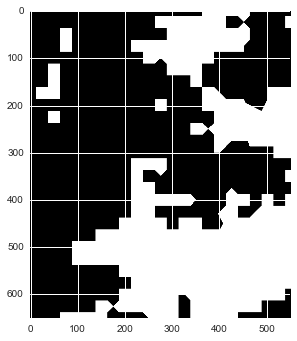

In [38]:

bc = zip(wt['burger'],wt['chinese'],wt['thai'],wt['pizza'])
kmeans = KMeans(2).fit(bc)
plot_clustering(wt,kmeans.labels_)

In [42]:
x = np.array([1,2,3,4,5])

print x+x

[ 2  4  6  8 10]


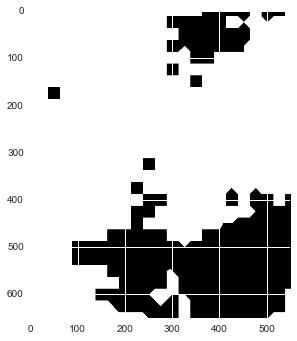

In [54]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(bc)

plot_clustering(wt,agglo.labels_)

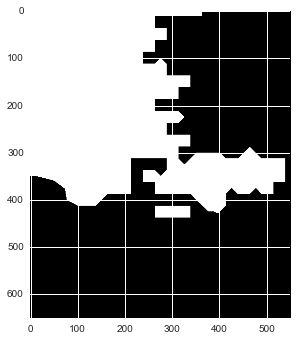

In [47]:
X = zip(wt['lat'],wt['lng'])
connectivity = kneighbors_graph(X, n_neighbors=10)
agglo = AgglomerativeClustering(n_clusters=2, connectivity=connectivity, linkage='ward').fit(bc)

plot_clustering(wt,agglo.labels_)

In [36]:
def plot_clustering(map_area,labels):
    map_area = map_area.sort(['px','py'])
    px = map_area['px']
    py = map_area['py']
    tx = list(set(map_area['tx']))
    ty = list(set(map_area['ty']))
    
    x_fine,y_fine = np.mgrid[np.min(px):np.max(px):1,np.min(py):np.max(py):1]

    points = np.matrix([[x,y] for x,y in zip(px,py)])
    first = True
    
 
    grid = griddata(points,labels,(x_fine,y_fine),'nearest')
    plt.imshow(grid)

In [55]:

bcsum = wt['burger']+wt['chinese']+wt['thai']+wt['pizza']
print 'Mean C0: ', np.mean(bcsum[agglo.labels_==0]),' +- ',np.std(bcsum[agglo.labels_==0])
print 'Mean C1: ', np.mean(bcsum[agglo.labels_==1]),' +- ',np.std(bcsum[agglo.labels_==1])


Mean C0:  190.37902884  +-  63.3810173113
Mean C1:  280.764274802  +-  82.7840065659


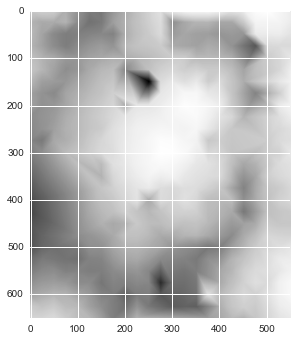

In [94]:
im = mapster.draw_mapster(wt,['thai'],plot=True)

In [123]:
bc[0]

[25.3125, 109.5625]

Mean C0:  57.055191358  +-  23.9201936233
Mean C0:  133.649473923  +-  28.2154122284
Mean C0:  96.3593703704  +-  27.1937518349
Mean C1:  41.0528818991  +-  20.7300607729
Mean C1:  160.930836674  +-  23.2159311434
Mean C1:  35.1762903029  +-  16.6221565356
Mean C2:  64.6782427282  +-  21.1005249541
Mean C2:  65.9574756181  +-  26.7341168166
Mean C2:  62.8060427965  +-  19.0426335189


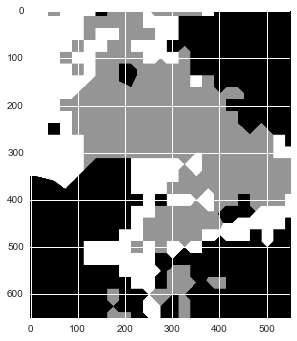

In [133]:
bc = [[a,b,c] for a,b,c in zip(wt['thai'],wt['mexican'],wt['coffee'])]

a = wt['thai']
b= wt['mexican']
c= wt['coffee']

kmeans = KMeans(3).fit(bc)
plot_clustering(wt,kmeans.labels_)
print 'Mean C0: ', np.mean(a[kmeans.labels_==0]),' +- ',np.std(a[kmeans.labels_==0])
print 'Mean C0: ', np.mean(b[kmeans.labels_==0]),' +- ',np.std(b[kmeans.labels_==0])
print 'Mean C0: ', np.mean(c[kmeans.labels_==0]),' +- ',np.std(c[kmeans.labels_==0])
print 'Mean C1: ', np.mean(a[kmeans.labels_==1]),' +- ',np.std(a[kmeans.labels_==1])
print 'Mean C1: ', np.mean(b[kmeans.labels_==1]),' +- ',np.std(b[kmeans.labels_==1])
print 'Mean C1: ', np.mean(c[kmeans.labels_==1]),' +- ',np.std(c[kmeans.labels_==1])
print 'Mean C2: ', np.mean(a[kmeans.labels_==2]),' +- ',np.std(a[kmeans.labels_==2])
print 'Mean C2: ', np.mean(b[kmeans.labels_==2]),' +- ',np.std(b[kmeans.labels_==2])
print 'Mean C2: ', np.mean(c[kmeans.labels_==2]),' +- ',np.std(c[kmeans.labels_==2])

Mean C0:  38.0821569673  +-  18.7386005582
Mean C0:  163.564892473  +-  21.6382780578
Mean C0:  34.8340442293  +-  16.987175778
Mean C1:  66.8742571386  +-  20.4842018794
Mean C1:  73.6619183855  +-  32.6121230998
Mean C1:  60.1960582753  +-  17.5206157989
Mean C2:  53.2752147075  +-  22.9307702795
Mean C2:  131.448428719  +-  33.2381496186
Mean C2:  101.803321256  +-  24.6501773107


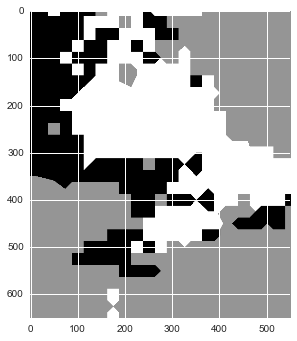

In [132]:
bc = [[a,b,c] for a,b,c in zip(wt['thai'],wt['mexican'],wt['coffee'])]
bc = StandardScaler().fit_transform(bc)
a = wt['thai']
b= wt['mexican']
c= wt['coffee']

kmeans = KMeans(3).fit(bc)
plot_clustering(wt,kmeans.labels_)
print 'Mean C0: ', np.mean(a[kmeans.labels_==0]),' +- ',np.std(a[kmeans.labels_==0])
print 'Mean C0: ', np.mean(b[kmeans.labels_==0]),' +- ',np.std(b[kmeans.labels_==0])
print 'Mean C0: ', np.mean(c[kmeans.labels_==0]),' +- ',np.std(c[kmeans.labels_==0])
print 'Mean C1: ', np.mean(a[kmeans.labels_==1]),' +- ',np.std(a[kmeans.labels_==1])
print 'Mean C1: ', np.mean(b[kmeans.labels_==1]),' +- ',np.std(b[kmeans.labels_==1])
print 'Mean C1: ', np.mean(c[kmeans.labels_==1]),' +- ',np.std(c[kmeans.labels_==1])
print 'Mean C2: ', np.mean(a[kmeans.labels_==2]),' +- ',np.std(a[kmeans.labels_==2])
print 'Mean C2: ', np.mean(b[kmeans.labels_==2]),' +- ',np.std(b[kmeans.labels_==2])
print 'Mean C2: ', np.mean(c[kmeans.labels_==2]),' +- ',np.std(c[kmeans.labels_==2])

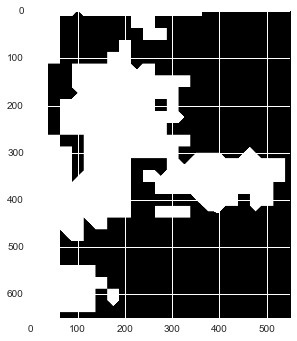

In [96]:
agglo = AgglomerativeClustering(n_clusters=2, connectivity=connectivity, linkage='ward').fit(bc)
plot_clustering(wt,agglo.labels_)

In [82]:
SpectralClustering?

In [86]:
from sklearn.cluster import SpectralClustering

labels = SpectralClustering(n_clusters=2).fit(im)


ValueError: different number of values and points

In [88]:
len(labels.labels_)

650

In [90]:
from sklearn import cluster, datasets
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

In [91]:
from sklearn.preprocessing import StandardScaler


In [92]:
two_means = cluster.MiniBatchKMeans(n_clusters=2)

In [93]:
noisy_circles

(array([[ 0.5731782 , -0.14714286],
        [ 0.74881762,  0.65355686],
        [-0.42361184, -0.91139919],
        ..., 
        [ 0.53109262,  0.20251765],
        [-0.90951587, -0.48977093],
        [-0.43776453, -0.76364941]]), array([1, 0, 0, ..., 1, 0, 0]))